# Data Understanding


- Date: Date data taken.
- Location: City in Australia.
- MinTemp: Minimum temparature of that collected date.
- MaxTemp: Maxium temparature of that collected date.


- Rainfall: Amount of rainfall that day in mm.
- Evaporation: Amount of evaporation in mm for 24 hours.
- Sunshine: The number of hours the day is bright with sunlight.


- WindGustDir: Direction of highest wind speed during the 24 hours prior to 12 at night that day.
- WindGustSpeed: The highest wind speed in km/h during the 24 hours before 12 at night that day.
- WindDir9am: Wind direction at 9 am.
- WindDir3pm: Wind direction at 3 pm.
- WindSpeed9am: Wind speed at 9am in km/hour calculated from the average wind speed 10 minutes before 9 am.
- WindSpeed3pm: Wind speed at 3pm in km/hour calculated from the average wind speed 10 minutes before 3 pm.


- Humidity9am: Humidity at 9am in percentage.
- Humidity3pm: Humidity at 3pm in percentage.
- Pressure9am: Barometric pressure at 9am in hpa.
- Pressure3pm: Barometric pressure at 3pm in hpa.


- Cloud9am: Percentage of sky covered by clouds at 9am. counted in octas, units ⅛, counting how many units ⅛ of the sky is covered with clouds. If 0, the sky is clear, if 8, the sky is completely covered with clouds.
- Cloud3pm: Percentage of sky covered by clouds at 3 pm.
- Temp9am: Temparature at 9am in Celcius.
- Temp3pm: Temparature at 3pm in Celcius.


- RainToday: did it rain today: if the rainfall in the 24 hours before 9am exceeded 1mm, then this value is 1, otherwise it is 0.
- RainTomorrow: The output if it Rain or Not.

<a id="Home"></a>

<h1 align="right">Halo Ka Bim ! 👋</h1>

## Shortcut 🏡

<a href="#1" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">D-Types Check</a>
<a href="#2" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Feature Engineering</a>
<a href="#2.5" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Visualization</a>
<a href="#3" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Train & Test Split</a>
<a href="#4" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">KNN</a>
<a href="#5" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Decision Tree</a>
<a href="#6" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Conclusion</a>

# Library 🏡

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import warnings

warnings.filterwarnings("ignore")

## 1.	Gunakan data “wtr.csv”

In [2]:
df = pd.read_csv('wtr.csv')
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


## 2.	Berapakah ukuran datanya?

In [3]:
df.shape

(145460, 23)

<a href="#Home" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Home</a>
<a id="1"></a>

## 3.	lakukan df.info () dan value_counts(), apakah data types pada semua column sudah tepat?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
for col in df.columns:
    print(f"{col}:")
    print(df[col].value_counts())
    print("-----"*8,"\n")
    
    # Check if data type is correct
    if df[col].dtype != 'object':
        print(f"{col} should not be an object data type")
    else:
        print(f"{col} is an object data type")
    print("-----"*8,"\n")

Date:
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
---------------------------------------- 

Date is an object data type
---------------------------------------- 

Location:
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar              

<h3 style='text-align: center;'>Insights</h3>

- **ada ketimpangan data pada RainToday dan RainTomorrow**
- **ada 16 arah angin pada windgustdir**
- **nanti kolom date akan diubah menjadi int**

## 4.	Cek missing value dan cek berapa persen kah data yang hilang (nan) dari setiap kolomnya?

In [6]:
# Check missing values and percentage of missing values for each column
missing_values = [sum(df[col].isna()) for col in df.columns]
percent_missing = [(value / len(df)) * 100 for value in missing_values]

# Print the results
for i, col in enumerate(df.columns):
    print(f"{col}:")
    print(f"Missing Values: {missing_values[i]}")
    print(f"Percentage of Missing Values: {percent_missing[i]:.2f}%")
    print("-----"*8,"\n")

Date:
Missing Values: 0
Percentage of Missing Values: 0.00%
---------------------------------------- 

Location:
Missing Values: 0
Percentage of Missing Values: 0.00%
---------------------------------------- 

MinTemp:
Missing Values: 1485
Percentage of Missing Values: 1.02%
---------------------------------------- 

MaxTemp:
Missing Values: 1261
Percentage of Missing Values: 0.87%
---------------------------------------- 

Rainfall:
Missing Values: 3261
Percentage of Missing Values: 2.24%
---------------------------------------- 

Evaporation:
Missing Values: 62790
Percentage of Missing Values: 43.17%
---------------------------------------- 

Sunshine:
Missing Values: 69835
Percentage of Missing Values: 48.01%
---------------------------------------- 

WindGustDir:
Missing Values: 10326
Percentage of Missing Values: 7.10%
---------------------------------------- 

WindGustSpeed:
Missing Values: 10263
Percentage of Missing Values: 7.06%
---------------------------------------- 

WindD

<h3 style='text-align: center;'>Insights</h3>

- **missing value terbanyak pada kolom Sunshine, diikuti Evaporation,Cloud3pm & Evaporation**
- **hanya 2 kolom yang tidak ada missing value yaitu date & location**

# Feature Engineer 🏡 <a href="#Home" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Home</a> <a id="2"></a>

## 5.	Buatlah column dari column ‘Date’. Dengan ketentuan sebagai berikut:
- **a.	Day (int)**
- **b.	Month (int)**
- **c.	Year (int)**

In [7]:
# Create new columns for day, month, and year from the 'Date' column
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Print the first 5 rows of the updated DataFrame
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


## 6.	Dari Domain Knowledge dan EDA kita mengetahui bahwa salah satu factor yang mempengaruhi seringnya hujan adalah musim. Buatlah column Season dari column ‘Month’ dengan ketentuan sebagai berikut:
- **a.	12,1,2 = Summer (str)**
- **b.	3,4,5 = Fall (str)**
- **c.	6,7,8 = Winter (str)**
- **d.	9,10,11 = Spring (str)**

In [8]:
# Create a new column 'Season' based on the 'Month' column
df['Season'] = df['Month'].apply(lambda x: 
                                 'Summer' if x in [12, 1, 2] else
                                 'Fall' if x in [3, 4, 5] else
                                 'Winter' if x in [6, 7, 8] else
                                 'Spring'
                                )

# Print the first 5 rows of the updated DataFrame
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,Season
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,No,1,12,2008,Summer
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,No,2,12,2008,Summer
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,No,3,12,2008,Summer
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,No,4,12,2008,Summer
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,No,5,12,2008,Summer


## 7.	Pada column 'WindGustDir','WindDir9am','WindDir3pm' ada nan values. Ubah nan values dengan menggunakan kemunculan terbanyak (modus) berdasarkan tiap kota (‘Location’).

In [9]:
for name, group in df.groupby('Location'):
    print(name)
    print(group[['WindGustDir', 'WindDir9am', 'WindDir3pm']].mode())

Adelaide
  WindGustDir WindDir9am WindDir3pm
0         WSW        NNE        WSW
Albany
  WindGustDir WindDir9am WindDir3pm
0         NaN         NW        ESE
Albury
  WindGustDir WindDir9am WindDir3pm
0           W         SE          W
AliceSprings
  WindGustDir WindDir9am WindDir3pm
0         ESE        ESE        ESE
BadgerysCreek
  WindGustDir WindDir9am WindDir3pm
0          SW         SW        NNE
Ballarat
  WindGustDir WindDir9am WindDir3pm
0           N          N          N
Bendigo
  WindGustDir WindDir9am WindDir3pm
0         SSE        SSE          N
Brisbane
  WindGustDir WindDir9am WindDir3pm
0           E         SW        ENE
Cairns
  WindGustDir WindDir9am WindDir3pm
0          SE        SSE         SE
Canberra
  WindGustDir WindDir9am WindDir3pm
0          NW        NNW         NW
Cobar
  WindGustDir WindDir9am WindDir3pm
0          SW         NE         SW
CoffsHarbour
  WindGustDir WindDir9am WindDir3pm
0          NE         SW         NE
Dartmoor
  WindGustDir Wi

In [10]:
df[['WindGustDir', 'WindDir9am', 'WindDir3pm']] = df.groupby('Location')[['WindGustDir', 'WindDir9am', 'WindDir3pm']].apply(lambda group: group.fillna(group['WindDir9am'].mode().iloc[0] if not group['WindDir9am'].mode().empty else 'Unknown'))

## 8.	Pada semua column numeric Ubah nan values dengan nilai tengah (median) berdasarkan tiap kota (‘Location’).

In [11]:
# Replace NaN values with the median for all numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    median = df.groupby('Location')[col].median()
    df[col].fillna(df['Location'].map(median), inplace=True)
    median_global = df[col].median()
    df[col].fillna(median_global, inplace=True)

# Print the first 5 rows of the updated DataFrame
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,Season
0,2008-12-01,Albury,13.4,22.9,0.6,4.4,8.4,W,44.0,W,...,8.0,7.0,16.9,21.8,No,No,1,12,2008,Summer
1,2008-12-02,Albury,7.4,25.1,0.0,4.4,8.4,WNW,44.0,NNW,...,8.0,7.0,17.2,24.3,No,No,2,12,2008,Summer
2,2008-12-03,Albury,12.9,25.7,0.0,4.4,8.4,WSW,46.0,W,...,8.0,2.0,21.0,23.2,No,No,3,12,2008,Summer
3,2008-12-04,Albury,9.2,28.0,0.0,4.4,8.4,NE,24.0,SE,...,8.0,7.0,18.1,26.5,No,No,4,12,2008,Summer
4,2008-12-05,Albury,17.5,32.3,1.0,4.4,8.4,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,No,5,12,2008,Summer


## 9.	Buatlah sebuah barplot me-visualiisasi 10 kota dengan akumulasi hujan terbanyak (y=curah hujan,x=kota) . Tuliskan komentar kalian secara singkat. 

<a href="#Home" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Home</a> <a id="2.5"></a>

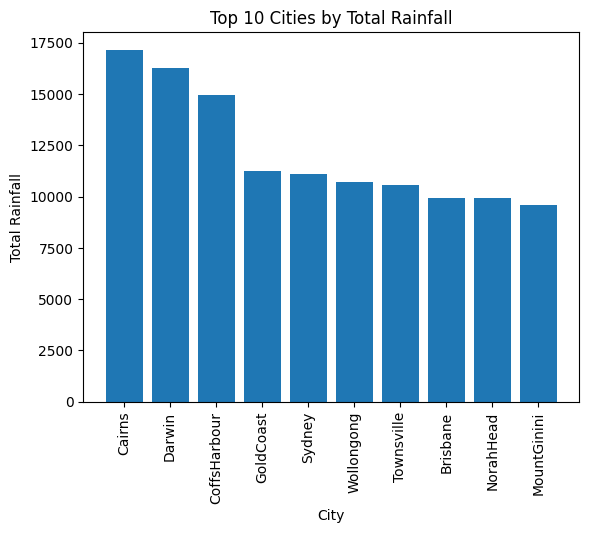

In [12]:
total_rainfall = df.groupby('Location')['Rainfall'].sum().sort_values(ascending=False)

# Create a barplot of the top 10 cities by rainfall
top_cities = total_rainfall.head(10)
plt.bar(top_cities.index, top_cities.values)
plt.title('Top 10 Cities by Total Rainfall')
plt.xlabel('City')
plt.ylabel('Total Rainfall')
plt.xticks(rotation=90)
plt.show()

<h3 style='text-align: center;'>Insights</h3>

- **Kota dengan curah hujan tertinggi adalah cairns, darwin, coffsharbour. Asumsi saya kemungkinan 3 wilayah ini berdekatan**

## 10.	Buatlah lineplot untuk curah hujan tiap tahunnya. Tuliskan komentar anda secara singkat.

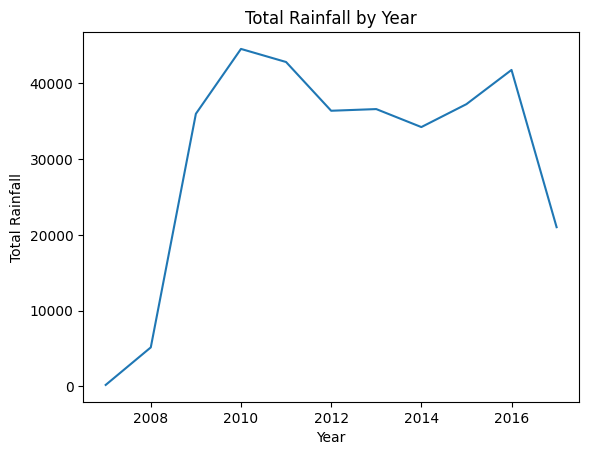

In [13]:
# Calculate the total rainfall for each year
total_rainfall = df.groupby('Year')['Rainfall'].sum()

# Create a lineplot of total rainfall by year
plt.plot(total_rainfall.index, total_rainfall.values)
plt.title('Total Rainfall by Year')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.show()

<h3 style='text-align: center;'>Insights</h3>

- **Puncak curah hujan tertinggi di Australia terjadi sekitar tahun 2010, bertahan di range 35.000 yang menandakan dalam 2010-2016 australia kemungkinan mengalami fase curah hujan tinggi sebelum akhirnya normal kembali setelah 2016.**

## 11.	Buatlah lineplot untuk curah hujan tiap bulan untuk tahun 2015. Tuliskan komentar anda secara singkat.

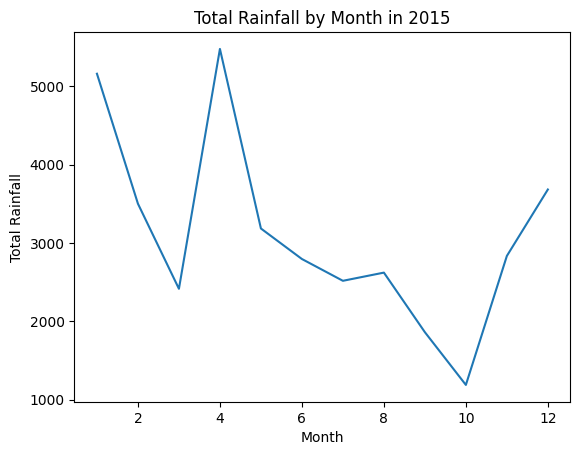

In [14]:
# Filter the data to include only observations from 2015
df_2015 = df[df['Year'] == 2015]

# Calculate the total rainfall for each month in 2015
total_rainfall = df_2015.groupby('Month')['Rainfall'].sum()

# Create a lineplot of total rainfall by month
plt.plot(total_rainfall.index, total_rainfall.values)
plt.title('Total Rainfall by Month in 2015')
plt.xlabel('Month')
plt.ylabel('Total Rainfall');

<h3 style='text-align: center;'>Insights</h3>

- **Curah Hujan tertinggi bukan di musim oktober - februari justru terjadi di bulan april**
- **transisi iklim terjadi di bulan april-oktober sebelum kembali ke musim hujan**

## 12.	Gunakan dummies encode pada column 'WindGustDir', 'WindDir9am', 'WindDir3pm', `Season`.

In [15]:
# Replace NaN values in Season with the mode for the entire dataset
df['Season'].fillna(df['Season'].mode()[0], inplace=True)

# Create dummy variables for WindGustDir, WindDir9am, WindDir3pm, and Season
df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Season'])

## 13.	Drop column “Date”.

In [16]:
df.drop('Date', axis=1, inplace=True)

In [17]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,Albury,13.4,22.9,0.6,4.4,8.4,44.0,20.0,24.0,71.0,...,0,0,0,0,1,0,0,0,1,0
1,Albury,7.4,25.1,0.0,4.4,8.4,44.0,4.0,22.0,44.0,...,0,0,0,0,0,1,0,0,1,0
2,Albury,12.9,25.7,0.0,4.4,8.4,46.0,19.0,26.0,38.0,...,0,0,0,0,0,1,0,0,1,0
3,Albury,9.2,28.0,0.0,4.4,8.4,24.0,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,1,0
4,Albury,17.5,32.3,1.0,4.4,8.4,41.0,7.0,20.0,82.0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
# restart > run all above here

<h1 style='text-align: center;'>🏡 Machine Learning Models 🏡</h1>

---

# Note: gunakan file `preprocessed`.

In [19]:
df1 = pd.read_csv('preprocessed')

In [20]:
df1.head(1)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_1
0,9.1,21.9,0.0,4.4,8.5,31.0,7.0,13.0,76.0,47.0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
df1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_1
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,...,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,12.221461,22.689955,0.020824,4.618522,8.415886,38.426474,12.959300,17.839346,69.453117,50.495166,...,0.045182,0.101394,0.106146,0.040444,0.063308,0.082465,0.073558,0.022673,0.085114,0.223423
std,4.181111,4.154771,0.061084,1.217460,1.036338,3.941004,4.387529,3.771905,9.988251,12.140619,...,0.207703,0.301851,0.308026,0.196999,0.243518,0.275073,0.261051,0.148858,0.279053,0.416541
min,3.200000,11.900000,0.000000,2.600000,6.400000,28.000000,4.000000,7.000000,36.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.100000,20.000000,0.000000,4.000000,8.200000,35.000000,9.000000,15.000000,65.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.100000,22.600000,0.000000,4.400000,8.500000,39.000000,15.000000,19.000000,70.000000,53.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.900000,24.500000,0.000000,5.000000,9.100000,41.000000,17.000000,20.000000,76.000000,58.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23.900000,35.000000,0.200000,8.400000,10.600000,46.000000,20.000000,26.000000,90.000000,69.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df1.describe(include='object')

,RainTomorrow
count,140787
unique,2
top,No
freq,109586


## 14.	Buat train-test split dengan ukuran data test = 30%. Dengan ` RainTomorrow ` sebagai targetnya.(random_state=10)

<a id="3"></a>
<a href="#Home" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Home</a>

In [23]:
X = df1.drop('RainTomorrow', axis= 1)
y = df1['RainTomorrow']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 10)

## 15.	Lakukan Standard Scaller pada x_train dan x_test

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 🏡 KNN <a href="#Home" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Home</a> <a id="4"></a>

## 16.	Buatlah grafik K-value vs eror rate dari grafik knn. K-value berapa yang anda pilih? Kenapa anda memilih pada angka tersebut?

In [28]:
error_rate = []

# Will take some time
for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

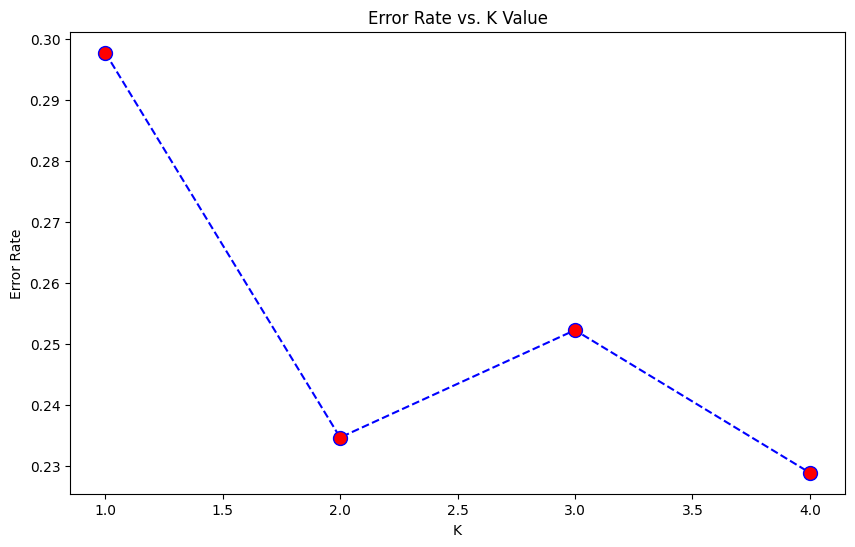

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [30]:
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Minimum error:- 0.2288751568529962 at K = 3


<h3 style='text-align: center;'>Insights</h3>

- **Smallest error equals to 0.22 at k=3. Maka kita akan menggunakan K-Value = 3, namun perlu diingat bahwa sebagai seorang datascientist yang baik perlu adanya pertimbangan lebih lanjut tidak hanya bergantung pada error_rate saja namun dari hal lain juga.**

## 17.	Lakukan training KNN dengan K-value yang anda pilih pada no 15. Buat classification report.

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
knn_pred = knn.predict(X_test)

In [35]:
knn_test_score = accuracy_score(y_test, knn_pred)

In [36]:
acc_knn = cross_val_score(knn, X_train, y_train, cv=5)

In [37]:
print(confusion_matrix(y_test,knn_pred))

[[28874  3985]
 [ 6670  2708]]


In [38]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

          No       0.81      0.88      0.84     32859
         Yes       0.40      0.29      0.34      9378

    accuracy                           0.75     42237
   macro avg       0.61      0.58      0.59     42237
weighted avg       0.72      0.75      0.73     42237



# 🏡 Decision Tree <a href="#Home" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Home</a> <a id="5"></a>

## 18.	Lakukan Training Decision Tree (depth=10) dan Buatlah tree plot dari model tesebut. Interpretasi hasil dari depth 0-1 saja. 

In [39]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=2)
model = clf.fit(X, y)

In [40]:
fn = df1.drop(['RainTomorrow'],axis=1).columns.values.tolist()
cn = df1.RainTomorrow.unique()

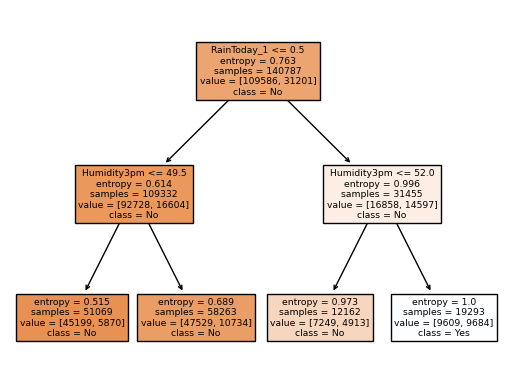

In [41]:
pl_tree = tree.plot_tree(clf,
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)

<h3 style='text-align: center;'>Insights</h3>

- **To classify an instance, we should answer the question at each node. For example for this tree plot, Is rainToday_1<=0.5? (are we talking about rain today or rain tomorrow?). If the answer is yes, you go to the left child node in the tree; otherwise you go to the right child node. You keep answering questions (was rain today is on the third class?, was rain_today_1 on the first class?), how about the humidity3pm? is the raintoday1 humidity3pm<=49.5), until you reach a leaf. When you are there, the prediction corresponds to the target class that has most instances.**

## 19.	Buat classification report modelnya

In [42]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=10)

In [43]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [44]:
dtc_pred = dtc.predict(X_test)

In [45]:
dtc_test_score = accuracy_score(y_test, dtc_pred)

In [46]:
acc_dtc = cross_val_score(dtc, X_train, y_train, cv=5)

In [47]:
print(confusion_matrix(y_test,dtc_pred))

[[31283  1576]
 [ 7445  1933]]


In [48]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

          No       0.81      0.95      0.87     32859
         Yes       0.55      0.21      0.30      9378

    accuracy                           0.79     42237
   macro avg       0.68      0.58      0.59     42237
weighted avg       0.75      0.79      0.75     42237



## 20.	dari classification report pilihlah model yang menurut anda lebih baik? Jelaskan kenapa anda memilih model tersebut. <a href="#Home" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Home</a> <a id="6"></a>

In [49]:
results = pd.DataFrame({
    'Model': ['Decision Tree Classifier', 'KNN Model'],
    'Train Score': [acc_dtc.mean(), acc_knn.mean()],
    'Test Score': [dtc_test_score, knn_test_score]          
              })
result_df = results.sort_values(by='Train Score', ascending=False)
result_df = result_df.set_index('Model')

In [50]:
result_df

,Train Score,Test Score
Model,,
Decision Tree Classifier,0.784465,0.786419
KNN Model,0.743409,0.747733


<h3 style='text-align: center;'>Insights</h3>

- **Berdasarkan classification report untuk 2 Model yaitu Decision Tree & KNN, berdasarkan result_df (Train - Test menggunakan cross val score dengan cv=5), asumsi saya Decision Tree akan jauh lebih fit untuk dataset ini. Kenapa saya memilih model tersebut karena difference atau selisih antar 2 model ini yang paling sedikit adalah Decision Tree dengan selish akurasi 4% lebih dibanding KNN.**

- **Namun pilihan saya bisa salah karena kurangnya pengetahuan akan karakteristik model model lain, mungkin seiring berjalannya waktu saya dapat memilih model mana yang terbaik**

<h4 align="right">the end</h4>